In [ ]:
##################################################    IMPORTING LIBRARIES   #######################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
################################################### DATA SECTION ##################################################################

data = pd.read_csv("/content/diabetes.csv")
columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[columns] = data[columns].replace(0, np.NaN)
data = data.dropna()

#------------------------------------------------------------------------------     #Data dividing for tran, valid and test
ntrain = int(len(data)*0.60)
nvalid = int(len(data)*0.90)
#------------------------------------------------------------------------------     # train, validation and test data
Xtrain = data.iloc[:ntrain, 0:8].values
Xvalid = data.iloc[ntrain:nvalid, 0:8].values
Xtest = data.iloc[nvalid:, 0:8].values

Ytrain = data.iloc[:ntrain, 8:9].values
Yvalid = data.iloc[ntrain:nvalid, 8:9].values
Ytest = data.iloc[nvalid:, 8:9].values
#-------------------------------------------------------------------------------      # standardized data
scaler_xtrain = MinMaxScaler()
xtrain_sc = scaler_xtrain.fit_transform(Xtrain)

scaler_xvalid = MinMaxScaler()
xvalid_sc = scaler_xvalid.fit_transform(Xvalid)

scaler_xtest = MinMaxScaler()
xtest_sc = scaler_xtest.fit_transform(Xtest)
#------------------------------------------------------------------------------       # Adding ones column in the data
ones_tn = np.ones(shape = (xtrain_sc.shape[0],1))
xtrain_sc = np.hstack([ones_tn, xtrain_sc])

ones_va = np.ones(shape = (xvalid_sc.shape[0],1))
xvalid_sc =  np.hstack([ones_va, xvalid_sc])

ones_ts = np.ones(shape = (xtest_sc.shape[0],1))
xtest_sc = np.hstack([ones_ts, xtest_sc])

#------------------------------------------------------------------------------

In [ ]:
##################################################  HELPER FUNCTION  ##################################################3

def intializer(layers):
  np.random.seed(3)
  W = np.random.randn(layers[0], layers[1])  
  return (W)

def sigmoid(z):
  sig = 1.0/(1.0+np.exp(-z))
  return (sig)

def decision_fn(A):                                                            
  dec = np.where(A > 0.5, 1, 0)
  return(dec)

def predict(X, W):
  Z = np.dot(X, W)
  A = sigmoid(Z)
  A = decision_fn(A)
  return (A)

def minimumcost(vault):
  ix = vault[4].index(min(vault[4]))                         
  W = vault[0][ix]
  W = W.T
  return (W)


def SPLPrediction(X,Y,W):
  pred = predict(X, W)
  accuracy = accuracy_score(Y, pred)*100
  f1 = f1_score(Y, pred)*100
  misclassification = 100-accuracy
  result = [accuracy, f1, misclassification]
  return (result)


In [ ]:
################################################################### ALGORITHM #########################################################

def SPLGD(X,Y,lr,epochs,layers,labd):                                                 # gradient descent for train data
  costs = []
  weights = []
  Zpred = []
  Apred = []
  errpred = []
  grads = []
  W = intializer(layers)
  for epoch in range(epochs):
    Z = np.dot(X, W)
    A = sigmoid(Z)
    error = A - Y
    m = A.shape[0]
    loss = -(np.dot(Y.T, np.log(A)) + np.dot((1-Y.T),np.log(1-A)))
    cost = (np.sum(loss)/m) + (labd/(2*m)*np.dot(W.T, W))
    grad =np.dot(X.T, error)
    weights.append(W.T)
    costs.append(cost)
    Zpred.append(Z.T)
    Apred.append(A.T)
    errpred.append(error.T)
    grads.append(grad.T)
    W = W - (lr/m)*(grad)-(lr*labd*W)
  vault =[weights,Zpred, Apred, errpred, costs,grads]
  return (vault)


def SPLGD_RG_VA(X, Y, W, lr,epochs,layers,labd):                                     # L2- Regualrised gradient descent for validation data
  costs = []
  weights = []
  Zpred = []
  Apred = []
  errpred = []
  grads = []
  for epoch in range(epochs):
    Z = np.dot(X, W)
    A = sigmoid(Z)
    error = A - Y
    m = A.shape[0]
    loss = -(np.dot(Y.T, np.log(A)) + np.dot((1-Y.T),np.log(1-A)))
    cost = (np.sum(loss)/m) + (labd/(2*m)*np.dot(W.T, W))
    grad =np.dot(X.T, error)
    weights.append(W.T)
    costs.append(cost)
    Zpred.append(Z.T)
    Apred.append(A.T)
    errpred.append(error.T)
    grads.append(grad.T)
    W = W - (lr/m)*(grad)-(lr*labd*W)
  vault =[weights, Zpred, Apred, errpred, costs, grads]
  return (vault)

use 60-30-10 rule for data split(train-valid-test)

TEST-1

In [ ]:
layersT1 = [xtrain_sc.shape[1],1]
lrT1 = 0.06
Tepochs1 = 10000
vaultT1 = SPLGD(X = xtrain_sc, Y =Ytrain, labd = 0.0, layers = layersT1, lr =lrT1, epochs = Tepochs1)
cost1 = np.asarray(vaultT1[4]).reshape(Tepochs1,1)

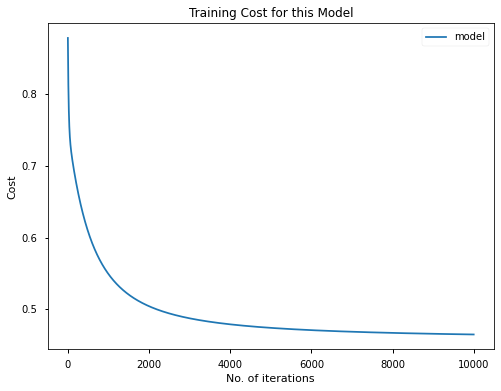

In [ ]:
plt.figure(figsize = (8,6))
plt.style.use(style = 'seaborn-notebook')
plt.plot(cost1, label = "model")
plt.title("Training Cost for this Model")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")  
plt.legend()
plt.show()

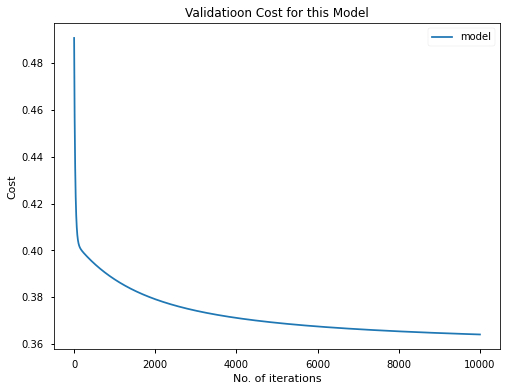

In [ ]:
Wmin1 = minimumcost(vaultT1)
lr1 = 0.05
Vepochs1 = 10000
labd1 = 0.001
layers1 = [xvalid_sc.shape[1], 1]
validModel1  = SPLGD_RG_VA(xvalid_sc, Yvalid, Wmin1, lr1, Vepochs1, layers1, labd1)
vcost1 = np.asarray(validModel1[4]).reshape(Vepochs1,1)
plt.figure(figsize = (8,6))
plt.style.use(style = 'seaborn-notebook')
plt.plot(vcost1, label = "model")
plt.title("Validatioon Cost for this Model")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")  
plt.legend()
plt.show()

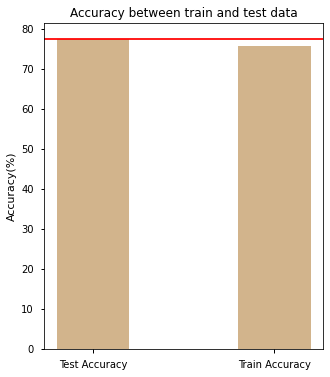

In [ ]:
VWmin1 = minimumcost(validModel1)
testpred1 = SPLPrediction(xtest_sc, Ytest, VWmin1)
trainpred1 = SPLPrediction(xtrain_sc, Ytrain, Wmin1)

plt.figure(figsize = (5,6))
plt.bar(x = ['Test Accuracy', 'Train Accuracy'], height = [testpred1[0], trainpred1[0]], width = 0.4, color = 'tan')
plt.axhline(y = testpred1[0], color = 'r')
plt.title("Accuracy between train and test data")
plt.ylabel("Accuracy(%)")
plt.show()

In [ ]:
testpred1

[77.5, 60.86956521739131, 22.5]

TEST-2

In [ ]:
layers2 = [xtrain_sc.shape[1],1]
lr2 = 0.06
Tepochs2 = 10000
vaultT2 = SPLGD(X = xtrain_sc, Y =Ytrain, labd = 0.0, layers = layers2, lr =lr2, epochs = Tepochs2)
vcost2 = np.asarray(vaultT2[4]).reshape(Tepochs2,1)

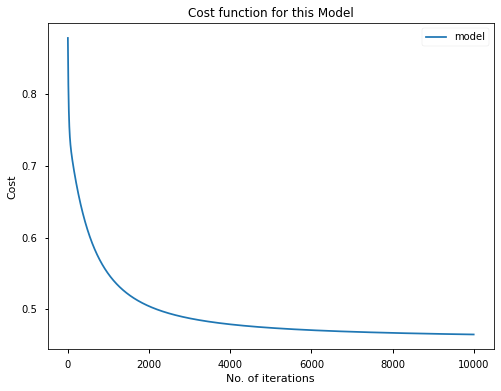

In [ ]:
plt.figure(figsize = (8,6))
plt.style.use(style = 'seaborn-notebook')
plt.plot(vcost2, label = "model")
plt.title("Cost function for this Model")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")  
plt.legend()
plt.show()

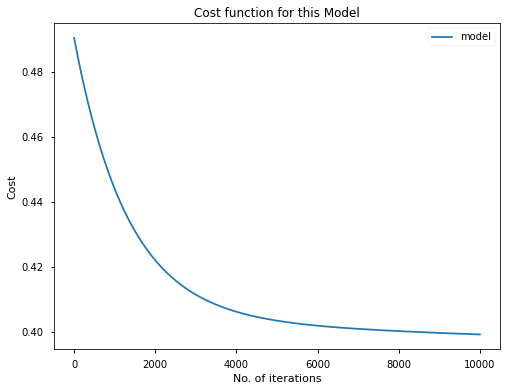

In [ ]:
Wmin2 = minimumcost(vaultT2)
lr2 = 0.001
Vepochs2 = 10000
labd2 = 0.0005
layers2 = [xvalid_sc.shape[1], 1]
validModel2  = SPLGD_RG_VA(xvalid_sc, Yvalid, Wmin2, lr2, Vepochs2, layers2, labd2)
vcost2 = np.asarray(validModel2[4]).reshape(Vepochs2,1)
plt.figure(figsize = (8,6))
plt.style.use(style = 'seaborn-notebook')
plt.plot(vcost2, label = "model")
plt.title("Cost function for this Model")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")  
plt.legend()
plt.show()


Accuracy for the test data is:  85.0
Accuracy for the train data is  75.74468085106383


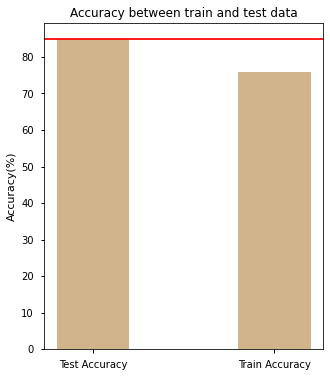

In [ ]:
VWmin2 = minimumcost(validModel2)
testpred2 = SPLPrediction(xtest_sc, Ytest, VWmin2)
trainpred2 = SPLPrediction(xtrain_sc, Ytrain, Wmin2)

print("Accuracy for the test data is: ", testpred2[0])
print("Accuracy for the train data is ", trainpred2[0])

plt.figure(figsize = (5,6))
plt.bar(x = ['Test Accuracy', 'Train Accuracy'], height = [testpred2[0], trainpred2[0]], width = 0.4, color = 'tan')
plt.axhline(y = testpred2[0], color = 'r')
plt.title("Accuracy between train and test data")
plt.ylabel("Accuracy(%)")
plt.show()

In [ ]:
testpred2

[85.0, 75.0, 15.0]

TEST-3

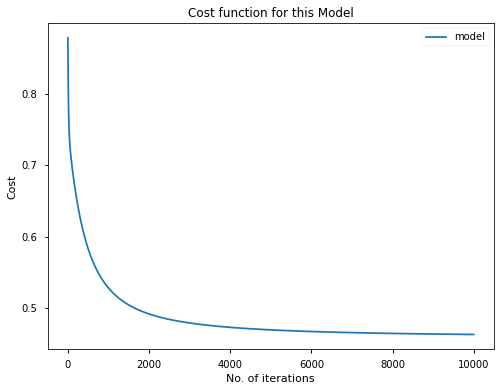

In [ ]:
layers3 = [xtrain_sc.shape[1],1]
lr3 = 0.08
Tepochs3 = 10000
vaultT3 = SPLGD(X = xtrain_sc, Y =Ytrain, labd = 0.0, layers = layers3, lr =lr3, epochs = Tepochs3)
vcost3 = np.asarray(vaultT3[4]).reshape(Tepochs3,1)

plt.figure(figsize = (8,6))
plt.style.use(style = 'seaborn-notebook')
plt.plot(vcost3, label = "model")
plt.title("Cost function for this Model")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")  
plt.legend()
plt.show()

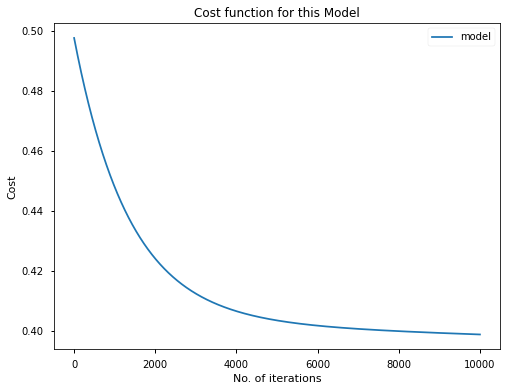

In [ ]:
Wmin3 = minimumcost(vaultT3)
lr3 = 0.001
Vepochs3 = 10000
labd3 = 0.0005
layers3 = [xvalid_sc.shape[1], 1]
validModel3  = SPLGD_RG_VA(xvalid_sc, Yvalid, Wmin3, lr3, Vepochs3, layers3, labd3)
vcost3 = np.asarray(validModel3[4]).reshape(Vepochs3,1)
plt.figure(figsize = (8,6))
plt.style.use(style = 'seaborn-notebook')
plt.plot(vcost3, label = "model")
plt.title("Cost function for this Model")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")  
plt.legend()
plt.show()

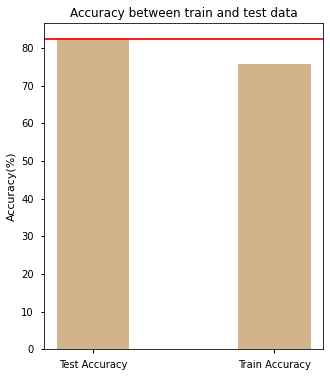

In [ ]:
VWmin3 = minimumcost(validModel3)
testpred3 = SPLPrediction(xtest_sc, Ytest, VWmin3)
trainpred3 = SPLPrediction(xtrain_sc, Ytrain, Wmin3)

plt.figure(figsize = (5,6))
plt.bar(x = ['Test Accuracy', 'Train Accuracy'], height = [testpred3[0], trainpred3[0]], width = 0.4, color = 'tan')
plt.axhline(y = testpred3[0], color = 'r')
plt.title("Accuracy between train and test data")
plt.ylabel("Accuracy(%)")
plt.show()

In [ ]:
testpred3

[82.5, 72.00000000000001, 17.5]

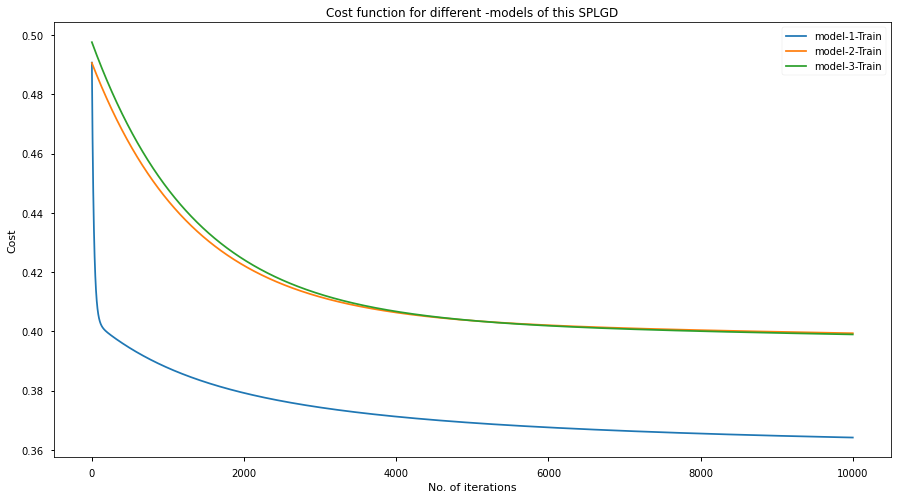

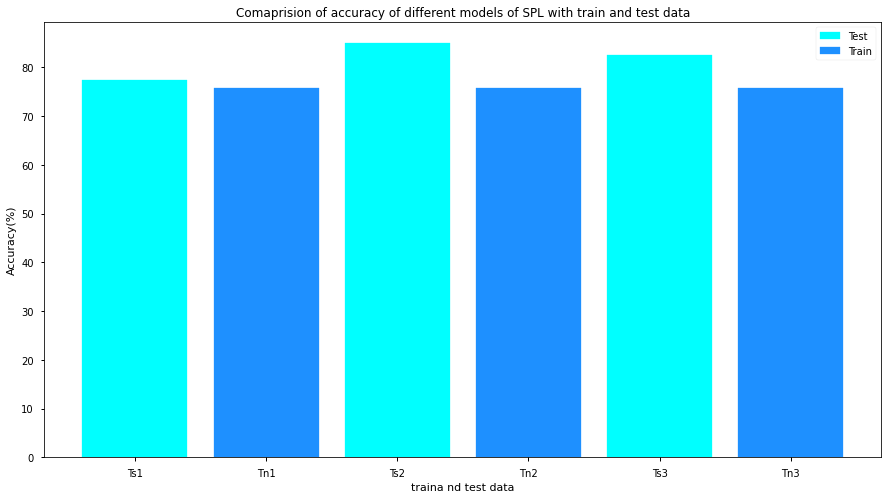

In [ ]:
# overall performance

plt.figure(figsize = (15,8))
plt.style.use(style = 'seaborn-notebook')
plt.plot(vcost1, label = "model-1-Train")
plt.plot(vcost2, label = "model-2-Train")
plt.plot(vcost3, label = "model-3-Train")

plt.title("Cost function for different -models of this SPLGD")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()


plt.figure(figsize = (15,8))
bar1 = plt.bar(x = ['Ts1', 'Tn1'],height= [testpred1[0], trainpred1[0]])
bar2 = plt.bar(x = ['Ts2', 'Tn2'],height= [testpred2[0], trainpred2[0]])
bar3 = plt.bar(x = ['Ts3', 'Tn3'],height= [testpred3[0], trainpred3[0]])

bar1[0].set_color('cyan')
bar2[0].set_color('cyan')
bar3[0].set_color('cyan')

bar1[1].set_color('dodgerblue')
bar2[1].set_color('dodgerblue')
bar3[1].set_color('dodgerblue')

cyan = mpatch.Patch(color = 'cyan', label = 'Test')
dodge = mpatch.Patch(color='dodgerblue', label = 'Train')

plt.title("Comaprision of accuracy of different models of SPL with train and test data")
plt.xlabel("traina nd test data")
plt.ylabel("Accuracy(%)")
plt.legend(handles = [cyan, dodge])
plt.show()

In [ ]:
Accu = [testpred1[0], testpred2[0], testpred3[0]]
F1 = [testpred1[1], testpred2[1], testpred3[1]]
Mis = [testpred1[2],testpred2[2], testpred3[2]]
def ReportResults(Accu, F1, Mis):
  results = {'Model': ['Model-1', 'Model-2', 'Model-3'], 'Accuracy': Accu, 'F1 score': F1, 'Misclassification': Mis}
  return (pd.DataFrame.from_dict(results))

In [ ]:
ReportResults(Accu, F1, Mis)

,Model,Accuracy,F1 score,Misclassification
0,Model-1,77.5,60.869565,22.5
1,Model-2,85.0,75.000000,15.0
2,Model-3,82.5,72.000000,17.5
